<a href="https://colab.research.google.com/github/dsadasafd/GAN/blob/main/humanface_celeba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('./mount')

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import h5py
import numpy, pandas, random
import matplotlib.pyplot as plt


In [ ]:
class CelebADataset(Dataset):

  def __init__(self, file):

    super().__init__()
    self.file_object = h5py.File(file, 'r')
    self.dataset = self.file_object['img_align_celeba']
    pass


  def __len__(self):

    return len(self.dataset)


  def __getitem__(self, index):

    if (index >= len(self.dataset)):
      raise IndexError()
    img = numpy.array(self.dataset[str(index)+'.jpg'])

    return torch.FloatTensor(img) / 255.0


  def plot_image(self, index):

     plt.imshow(numpy.array(self.dataset[str(index)+'.jpg']), interpolation='nearest')
     pass

pass



In [ ]:
celeba_dataset = CelebADataset('mount/My Drive/Colab Notebooks/celeba_data/celeba_aligned_small.h5py')

# print(celeba_dataset.dataset['25.jpg'])
type(celeba_dataset.__getitem__(25))



torch.Tensor

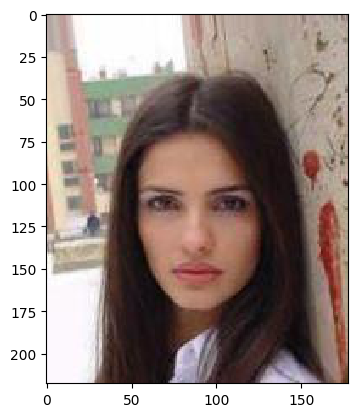

In [ ]:
celeba_dataset.plot_image(25)

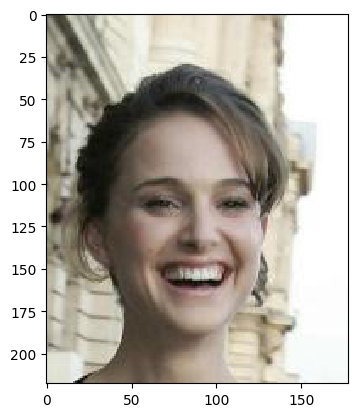

In [ ]:
celeba_dataset.plot_image(1949)

In [ ]:
class View(nn.Module):

  def __init__(self, shape):
    super().__init__()
    self.shape = shape,

  def forward(self, x):
    return x.view(*self.shape)


def generate_random_image(size):
  random_data = torch.rand(size)
  return random_data

In [ ]:
from torch.nn.modules.loss import BCELoss
# create discriminator class

class Discriminator(nn.Module):

  def __init__(self):

    # 继承父类
    super().__init__()

    # 神经网络架构
    self.model = nn.Sequential(
        View(218*178*3),

        nn.Linear(218*178*3, 100),
        nn.LeakyReLU(),

        nn.LayerNorm(100),

        nn.Linear(100, 1),
        nn.Sigmoid()
    )

    # 损失函数
    self.loss_function = nn.BCELoss()

    # 优化器
    self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

    # 计数器和误差记录
    self.counter = 0
    self.loss_progress = []

    pass



  def forward(self, inputs):
    return self.model(inputs)


  def train(self, inputs, targets):

    outputs = self.model(inputs)
    loss = self.loss_function(outputs, targets)

    self.counter += 1

    if self.counter % 10 == 0:
      self.loss_progress.append(loss.item())

    if self.counter % 1000 == 0:
      print('counter = ', self.counter)

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass



  def plot_progress(self):

    df = pandas.DataFrame(self.loss_progress, columns=['loss'])
    df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0.0, 0.25, 0.5, 1.0, 5.0))
    pass

pass







In [ ]:
%%time

# 测试鉴别器

D = Discriminator()

for image_data_tensor in celeba_dataset:

  # 真实数据训练
  D.train(image_data_tensor, torch.FloatTensor([1.0]))

  # 随机数据训练
  D.train(generate_random_image((218,178,3)), torch.FloatTensor([0.0]))

  pass

counter =  1000
counter =  2000
counter =  3000
counter =  4000
counter =  5000
counter =  6000
counter =  7000
counter =  8000
counter =  9000
counter =  10000
counter =  11000
counter =  12000
counter =  13000
counter =  14000
counter =  15000
counter =  16000
counter =  17000
counter =  18000
counter =  19000
counter =  20000
counter =  21000
counter =  22000
counter =  23000
counter =  24000
counter =  25000
counter =  26000
counter =  27000
counter =  28000
counter =  29000
counter =  30000
counter =  31000
counter =  32000
counter =  33000
counter =  34000
counter =  35000
counter =  36000
counter =  37000
counter =  38000
counter =  39000
counter =  40000
CPU times: user 53min 23s, sys: 55min 2s, total: 1h 48min 25s
Wall time: 1h 49min 3s


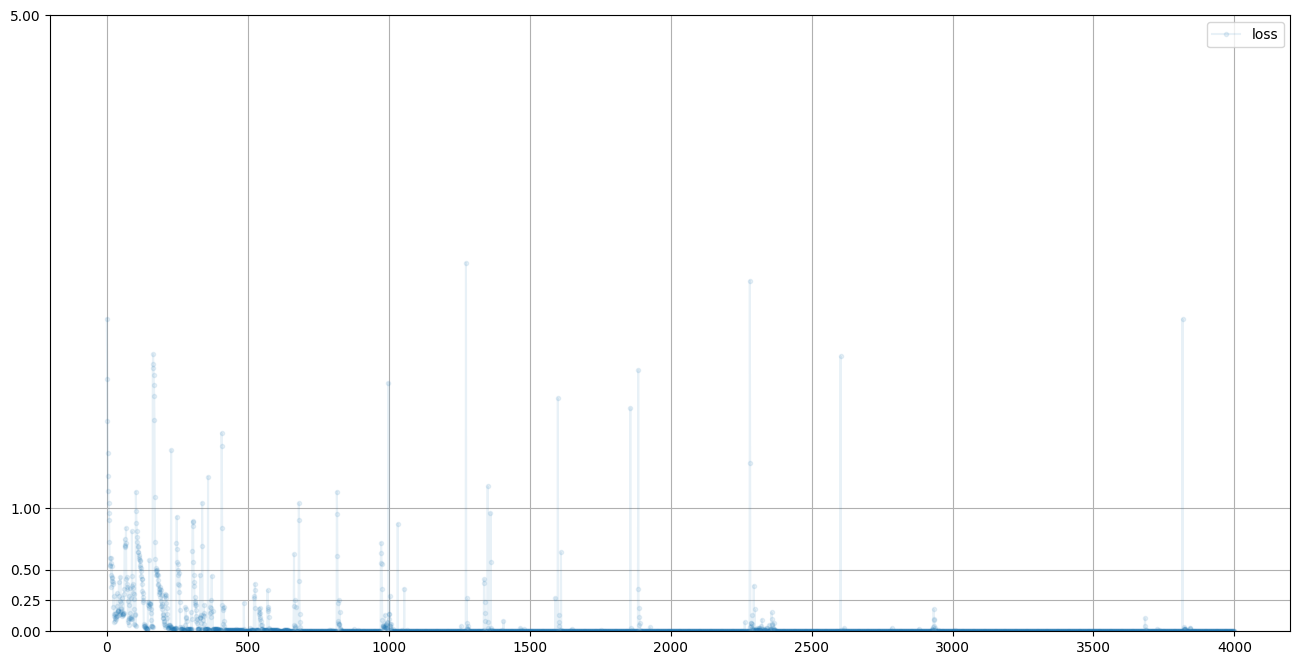

In [ ]:
D.plot_progress()